In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from functions import *
from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster, leaders, centroid
from scipy.spatial.distance import pdist
from scipy import stats, cluster


In [2]:
#importer la table cleints à partir d'un fichier CSV
address_notes = 'C:/Users/Oscar Gomez/Desktop/Data Analyst/P6/notes.csv'
notes = pd.DataFrame(pd.read_csv(address_notes))
notes.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [3]:
notes.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [4]:
n = len(notes)
print(n)

170


In [5]:
#nombre de varibles
p = 6

In [6]:
notes.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [7]:
notes.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


In [8]:
notes['is_genuine'].value_counts()

True     100
False     70
Name: is_genuine, dtype: int64

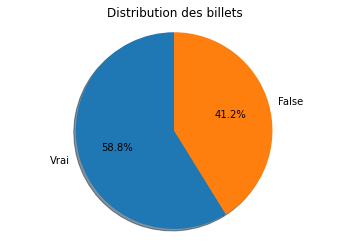

In [9]:
fig1, ax1 = plt.subplots()
ax1.pie(notes['is_genuine'].value_counts(), labels=['Vrai','False'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Distribution des billets')
plt.savefig('dist_billets.png')
plt.show()

In [10]:
notes[notes['is_genuine']==True].describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,171.976100,103.951500,103.775900,4.143500,3.055500,113.207200
std,0.307981,0.296251,0.292406,0.314509,0.197726,0.380476
min,171.040000,103.230000,103.140000,3.540000,2.270000,111.760000
25%,171.790000,103.740000,103.557500,3.900000,2.937500,112.995000
50%,172.005000,103.915000,103.760000,4.080000,3.070000,113.210000
75%,172.162500,104.145000,103.972500,4.382500,3.192500,113.505000
max,172.750000,104.860000,104.950000,5.040000,3.530000,113.980000


In [11]:
notes[notes['is_genuine']==False].describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,171.889857,104.230429,104.145571,5.281571,3.334571,111.660714
std,0.297426,0.213130,0.253152,0.540846,0.185102,0.676931
min,171.380000,103.780000,103.440000,3.820000,2.980000,109.970000
25%,171.682500,104.082500,103.982500,4.952500,3.185000,111.270000
50%,171.875000,104.215000,104.170000,5.265000,3.335000,111.765000
75%,172.047500,104.377500,104.280000,5.702500,3.450000,111.985000
max,173.010000,104.720000,104.860000,6.280000,3.680000,113.640000


In [12]:
notes.groupby('is_genuine').mean()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,171.889857,104.230429,104.145571,5.281571,3.334571,111.660714
True,171.976100,103.951500,103.775900,4.143500,3.055500,113.207200


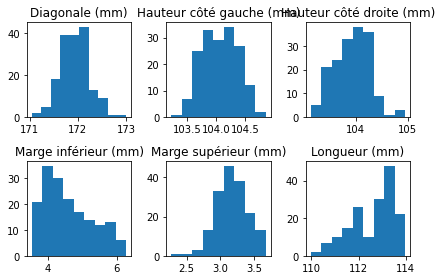

''

In [13]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3)

ax0.hist(notes['diagonal'], 10, histtype='bar')
ax0.set_title('Diagonale (mm)')

ax1.hist(notes['height_left'], 9, histtype='bar')
ax1.set_title('Hauteur côté gauche (mm)')

ax2.hist(notes['height_right'], 9, histtype='bar')
ax2.set_title('Hauteur côté droite (mm)')

ax3.hist(notes['margin_low'], 9, histtype='bar')
ax3.set_title('Marge inférieur (mm)')

ax4.hist(notes['margin_up'], 9, histtype='bar')
ax4.set_title('Marge supérieur (mm)')

ax5.hist(notes['length'], 9, histtype='bar')
ax5.set_title('Longueur (mm)')

plt.rcParams["figure.figsize"] = (10, 5)
fig.tight_layout()
plt.savefig('hist_billets.png')
plt.show()
;

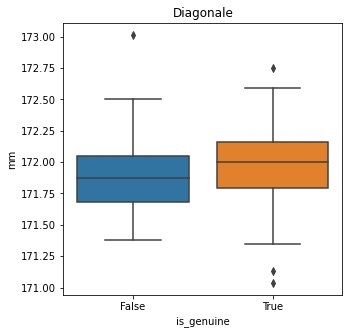

In [14]:
fig = plt.figure(figsize=(5,5))
notes_fig = sns.boxplot(x='is_genuine', y='diagonal', data=notes)
plt.title("Diagonale")
plt.ylabel("mm")
plt.savefig('boxplot_diag.png');

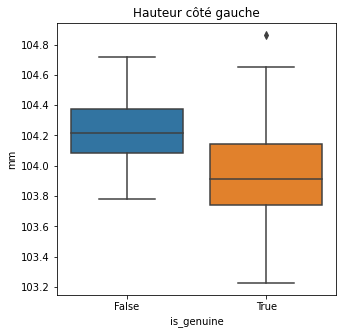

In [15]:
fig = plt.figure(figsize=(5,5))
notes_fig = sns.boxplot(x='is_genuine', y='height_left', data=notes)
plt.title("Hauteur côté gauche")
plt.ylabel("mm")
plt.savefig('boxplot_left.png');

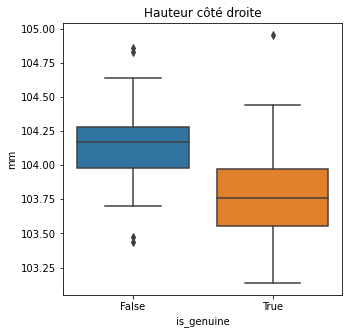

In [16]:
fig = plt.figure(figsize=(5,5))
notes_fig = sns.boxplot(x='is_genuine', y='height_right', data=notes)
plt.title("Hauteur côté droite")
plt.ylabel("mm")
plt.savefig('boxplot_right.png');

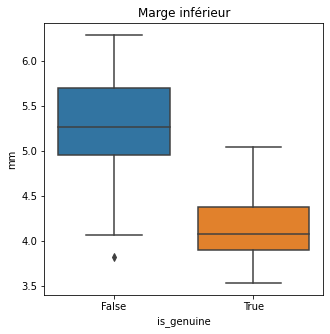

In [17]:
fig = plt.figure(figsize=(5,5))
notes_fig = sns.boxplot(x='is_genuine', y='margin_low', data=notes)
plt.title("Marge inférieur")
plt.ylabel("mm")
plt.savefig('boxplot_inf.png');

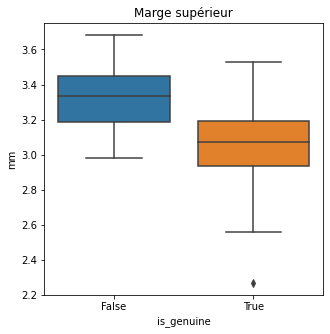

In [18]:
fig = plt.figure(figsize=(5,5))
notes_fig = sns.boxplot(x='is_genuine', y='margin_up', data=notes)
plt.title("Marge supérieur")
plt.ylabel("mm")
plt.savefig('boxplot_sup.png');

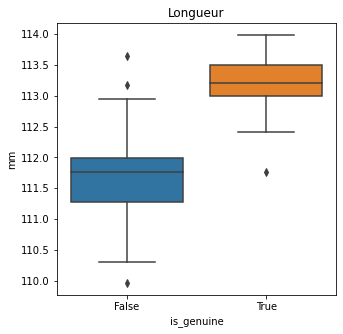

In [19]:
fig = plt.figure(figsize=(5,5))
notes_fig = sns.boxplot(x='is_genuine', y='length', data=notes)
plt.title("Longueur")
plt.ylabel("mm")
plt.savefig('boxplot_long.png');


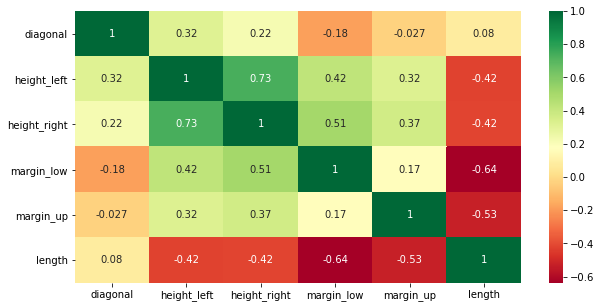

In [20]:
cor_matrix = notes.drop(columns=['is_genuine']).corr()
sns.heatmap(cor_matrix, cmap='RdYlGn', annot=cor_matrix)
plt.savefig('correlation.png');

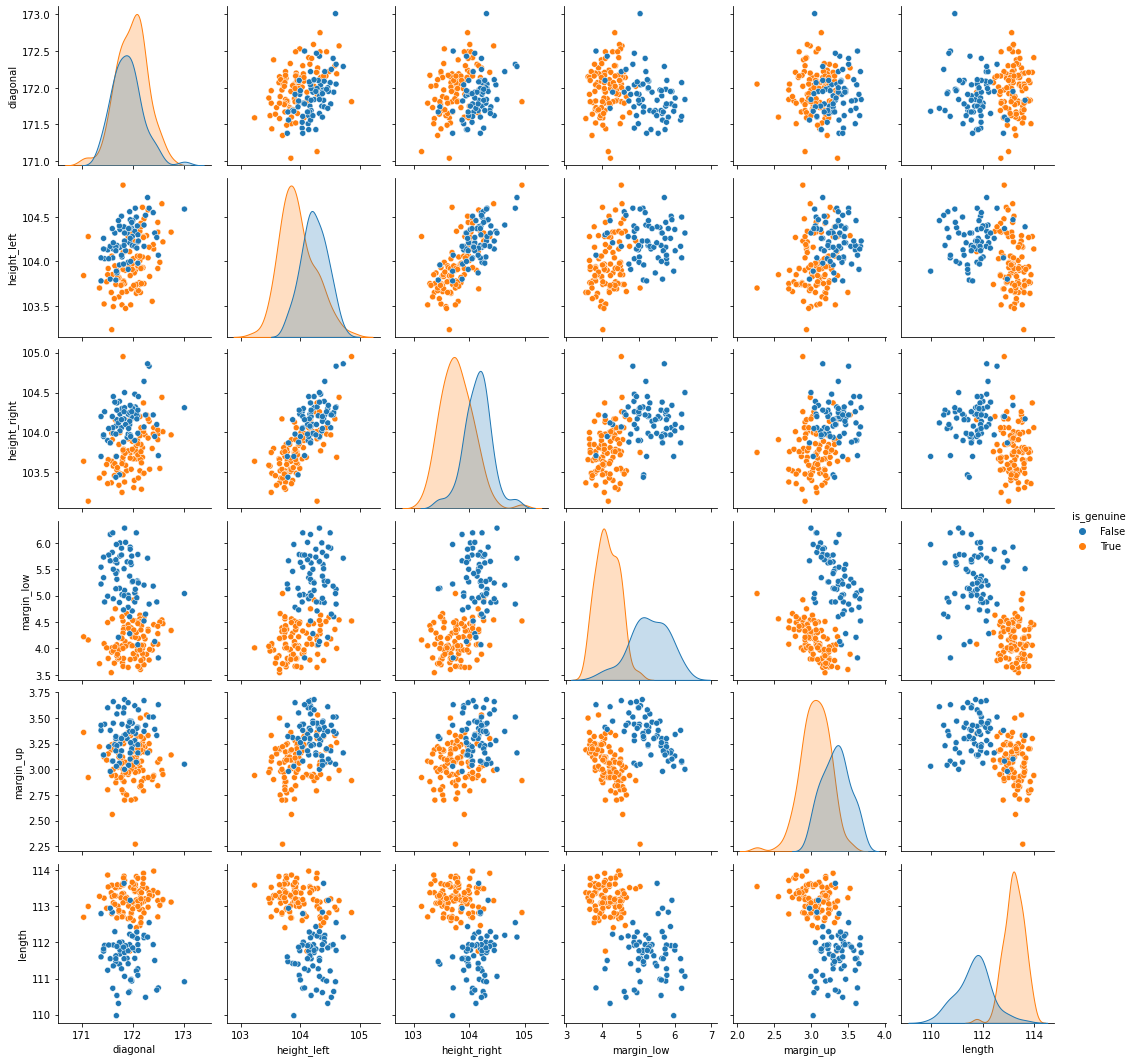

In [21]:
sns.pairplot(notes, hue='is_genuine', height=2.5)
plt.savefig('pairplot.png');

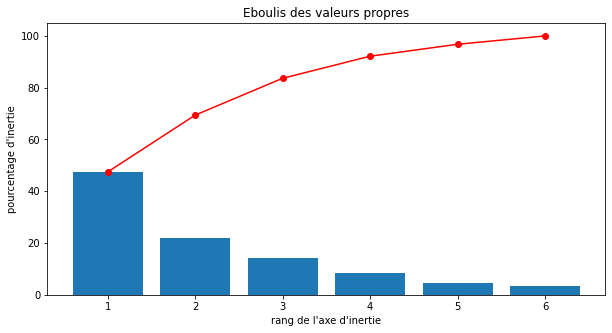

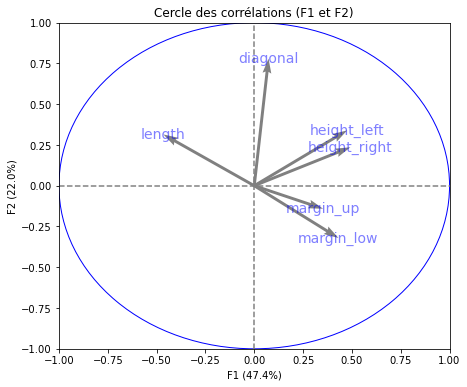

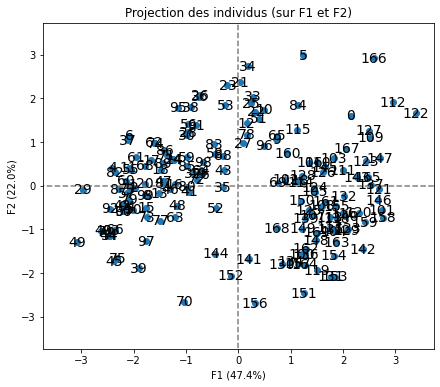

In [22]:
n_comp = 6
X1 = notes[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']].values
names = notes.index 
features = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X1)
X_scaled1 = std_scale.transform(X1)

# Calcul des composantes principales
pca_eboulis = decomposition.PCA(n_components=6)
pca_eboulis.fit(X_scaled1)

pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled1)

# Eboulis des valeurs propres
display_scree_plot(pca_eboulis)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, 2, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected1 = pca.transform(X_scaled1)
display_factorial_planes(X_projected1, 2, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

plt.show()

In [23]:
#valeurs propres
eigval = (n-1)/n*pca_eboulis.explained_variance_

#valeurs propres carrés
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca_eboulis.components_[k,:] * sqrt_eigval[k]
    
cos2var = corvar**2

#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':features,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

             id     CTR_1     CTR_2
0      diagonal  0.005369  0.607837
1   height_left  0.226102  0.115091
2  height_right  0.241888  0.055480
3    margin_low  0.185784  0.102744
4     margin_up  0.124284  0.019915
5        length  0.216572  0.098933


In [24]:
eigval

array([2.84687523, 1.31742636, 0.85407146, 0.51157773, 0.27676935,
       0.19327987])

In [25]:
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
bs

array([2.45      , 1.45      , 0.95      , 0.61666667, 0.36666667,
       0.16666667])

In [26]:
#contribution des individus dans l'inertie totale 
di = np.sum(X_scaled1**2,axis=1) 
cont_ind = pd.DataFrame({'d_i':di})
cont_ind = cont_ind.sort_values(by=['d_i'], ascending=False)
cont_ind.head(20)

,d_i
166,20.625650
0,18.410598
4,18.039567
122,16.790944
39,15.052608
112,14.422407
151,13.637281
49,12.917538
160,12.831169
158,12.724639


In [27]:
#qualité de représentation des individus - COS2 
cos2 = X_projected1**2 
for j in range(p): 
    cos2[:,j] = cos2[:,j]/di 
rep = pd.DataFrame({'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})
rep.head(10)

,COS2_1,COS2_2
0,0.251929,0.139000
1,0.818002,0.050822
2,0.784862,0.000466
3,0.882856,0.001652
4,0.320145,0.009417
5,0.132447,0.771985
6,0.538540,0.164137
7,0.736813,0.115779
8,0.505695,0.008692
9,0.222965,0.476836


In [28]:
rep['COS2_1'].mean()

0.47206797303351383

In [29]:
rep['COS2_2'].mean()

0.21494341274756967

In [30]:
#contributions aux axes 
ctr = X_projected1**2 
for j in range(p): 
    ctr[:,j] = ctr[:,j]/(n*eigval[j]) 
cont_axes = pd.DataFrame({'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})


In [31]:
#contributions sur le premier axe 
CTR1 = pd.DataFrame(cont_axes['CTR_1'])
CTR1 = CTR1.sort_values(by='CTR_1', ascending=False)
CTR1.head(10)

,CTR_1
122,0.023758
49,0.019620
29,0.018089
112,0.017950
158,0.015836
101,0.015483
147,0.015085
121,0.014871
146,0.014783
7,0.014226


In [32]:
#contributions sur le deuxieme axe 
CTR2 = pd.DataFrame(cont_axes['CTR_2'])
CTR2 = CTR2.sort_values(by='CTR_2', ascending=False)
CTR2.head(10)

,CTR_2
5,0.039736
166,0.037927
34,0.033302
156,0.032264
70,0.031516
151,0.026922
21,0.025151
23,0.023682
131,0.019298
153,0.019276


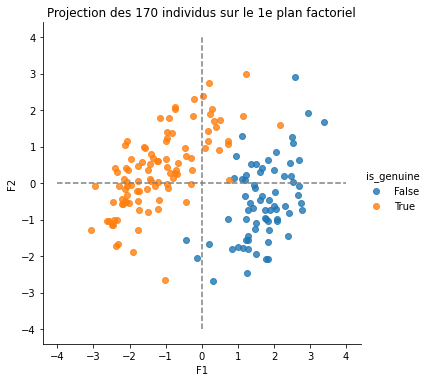

In [33]:
#variables sintétiques df
Xproj = pd.DataFrame(X_projected1)
Xproj = Xproj.set_index(notes.index)
Xproj['is_genuine'] = notes['is_genuine']
Xproj = Xproj.rename(columns={0:'F1', 1:'F2'})

#plot
g = sns.lmplot(x="F1", y="F2", hue="is_genuine", data=Xproj, fit_reg=False)
plt.plot([-4, 4], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-4, 4], color='grey', ls='--')
plt.title("Projection des {} individus sur le 1e plan factoriel".format(notes.shape[0]))
plt.savefig('proj_TF.png');

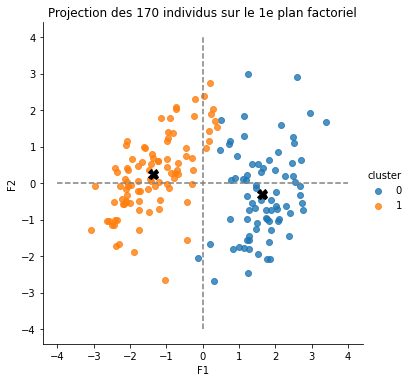

<Figure size 720x360 with 0 Axes>

In [34]:
# 2 clusters souhaités: Vrai et Faux
n_clust = 2 

# préparation des données pour le clustering
data_K = notes[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']].values

# Centrage et Réduction
data_scaled = preprocessing.StandardScaler().fit_transform(data_K)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(data_scaled)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_
Xproj['cluster'] = clusters

#centroids
centroids = pd.pivot_table(Xproj, index=['cluster'], 
                           values=['F1', 'F2'],
                           aggfunc='mean')

# Affichage du clustering par projection des individus sur le premier plan factoriel
g = sns.lmplot(x="F1", y="F2", hue="cluster", data=Xproj, fit_reg=False)
plt.plot(centroids['F1'], centroids['F2'], marker='X', markersize=10, linewidth=0, markerfacecolor='k', markeredgecolor='k')
plt.plot([-4, 4], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-4, 4], color='grey', ls='--')
plt.title("Projection des {} individus sur le 1e plan factoriel".format(notes.shape[0]))
plt.show()
plt.savefig('proj_clus.png');


In [35]:
notes['is_gen'] = notes['is_genuine'].astype(int)
notes['cluster'] = clusters
notes['class'] = np.where(notes['is_gen']==notes['cluster'], 1, 0)
notes.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,is_gen,cluster,class
0,True,171.81,104.86,104.95,4.52,2.89,112.83,1,0,0
1,True,171.67,103.74,103.70,4.01,2.87,113.29,1,1,1
2,True,171.83,103.76,103.76,4.40,2.88,113.84,1,1,1
3,True,171.80,103.78,103.65,3.73,3.12,113.63,1,1,1
4,True,172.05,103.70,103.75,5.04,2.27,113.55,1,1,1


In [36]:
print('L\'algorithme de classification non supervisée a correctement identifié {}% des billets comme faux ou vrais'.format(100*notes['class'].sum()/len(notes)))

L'algorithme de classification non supervisée a correctement identifié 94.70588235294117% des billets comme faux ou vrais


In [37]:
x = notes[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']].values
y = np.array(notes['is_gen'].values)
model = LogisticRegression().fit(x, y)

In [38]:
model.classes_

array([0, 1])

In [39]:
model.intercept_

array([-0.01511989])

In [40]:
model.coef_

array([[-0.37117129, -0.57990484, -1.04335572, -2.83568573, -1.50981796,
         2.2320178 ]])

In [41]:
model.predict_proba(x).round(2)

array([[0.36, 0.64],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.03, 0.97],
       [0.19, 0.81],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.45, 0.55],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.05, 0.95],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.04, 0.96],
       [0.05, 0.95],
       [0.08, 0.92],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.13, 0.87],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.04, 0.96],
       [0.15, 0.85],
       [0.09, 0.91],
       [0.07, 0.93],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.07, 0.93],
       [0.03, 0.97],
       [0.14, 0.86],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.  ,

In [42]:
model.predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
model.score(x, y)

0.9882352941176471

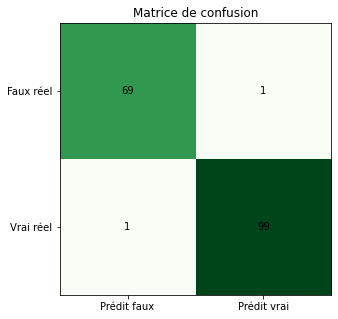

<Figure size 720x360 with 0 Axes>

In [44]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots()
ax.imshow(cm, cmap ='Greens')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Prédit faux', 'Prédit vrai'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Faux réel', 'Vrai réel'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.title('Matrice de confusion')
plt.show()
plt.savefig('mat_conf.png')

In [45]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       0.99      0.99      0.99       100

    accuracy                           0.99       170
   macro avg       0.99      0.99      0.99       170
weighted avg       0.99      0.99      0.99       170



In [46]:
#specificité
cm[0,0]/sum(cm[0,])

0.9857142857142858

In [47]:
#sensibilité
cm[1,1]/sum(cm[1,])

0.99

In [48]:
#lecture du fichier
nom = input('Nom du fichier')
address_ex = 'C:/Users/Oscar Gomez/Desktop/Data Analyst/P6/{}.csv'.format(nom)
example = pd.DataFrame(pd.read_csv(address_ex))

#selection des varibles
x_ex = example[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']].values

#prediction
x_pre = model.predict(x_ex)

#probabilites
prob = model.predict_proba(x_ex).round(2)

#création de tableaux
example['pred'] = x_pre
example['prob'] = prob[:,1]
example['class'] = np.where(example['pred']==1, True, False)
table_final = example.drop(columns = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length', 'pred'])
table_final.head(10)


Nom du fichierexample


,id,prob,class
0,A_1,0.04,False
1,A_2,0.01,False
2,A_3,0.03,False
3,A_4,0.88,True
4,A_5,1.00,True
